# Visualizing Geographic Data

## Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd
import os.path

# to make this notebook's output stable across runs
rnd.seed(4)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."

def save_fig(fig_id, tight_layout=True):
    image_dir = os.path.join(PROJECT_ROOT_DIR, "images")
    if not os.path.exists(image_dir):
        os.makedirs(image_dir)
    path = os.path.join(image_dir, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## Loading the data 

In [8]:
import pandas as pd
HOUSING_PATH = "http://gawron.sdsu.edu/housing.csv"
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = housing_path#os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

## Eyeballing the data

Let's look at some statewide housing data for California. **NOTE:  The data set is also used in the HOML notebook "End to End Machine Leanring Project".  You can learn more about it there.**

Each row represents one district in California.
The districts range in size from 1 household to
over 6,000.  They vary in location, income level, and of course, median house value.

In [9]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
print((housing.describe()))

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

The median income data has been scaled to some strange units.  More than that, it turns out
that it is **capped** at both ends.  The highest value is 15 and the lowest is .5.  This may
create some issues, but let's try and work with it.

# Discover and visualize the data to gain insights

Now comes the interesting idea.  Our data contains lat/long coordinates for each
housing district.  Each coordinate represent the geographic center of the
district.  As a start, let's do a simple scatter plot of all the districts
in our data.  Note the familiar shape that emerges.

Saving figure bad_visualization_plot


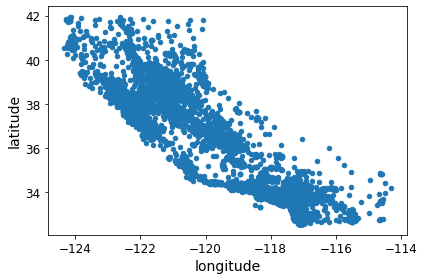

In [10]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


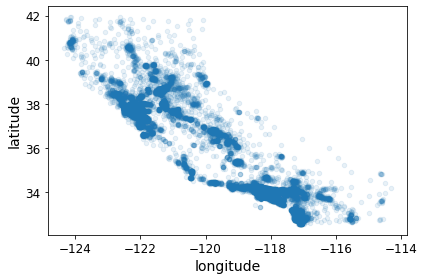

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

In the following `plot` command, the `c` parameter is telling us which column value to use to determine the color
given by the colormap.  The `s` parameter is determining the *size* of the point being plotted.  Thus the value
of the `median_house_value` for a point will determine its color, and the value in the `population` column   (divided
by 100) will determine its size.

Saving figure housing_prices_scatterplot


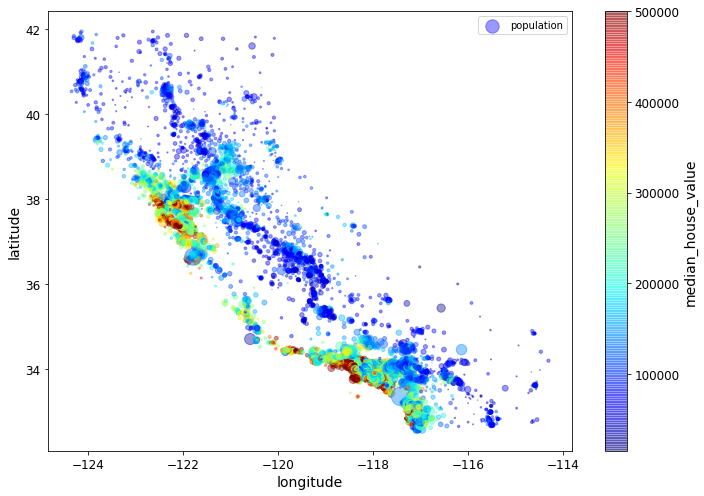

In [ ]:
# c is the attribute we'll map onto colors, s is the attribute we'll represent with circle size.
housing.plot(kind="scatter", x="longitude", y="latitude",
    s=housing['population']/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
save_fig("housing_prices_scatterplot")
plt.show()

Next we include a map-image showing the boundaries of Californa.  The map-image is a polygon with 4 corners (a rectangle).
The coordinates in our scatter plots are Lat/Longs.  To scale and position our  map-image to be consistent
with out scatterplot, we need the Lat long coordinates for two of the the 4 corners, the lower left and the upper right.  
Those are given in `extent` parameter in the order LongitudeLowerLeft, LongitudeUpperRight, LatitudeLowerLeft, LatitudeUpperRight.  Normally we would use a geographic tool kit like `basemap` (included as part of `matplotlib`) that provides geographic map polygons with boundaries of various kinds drawn, as well as the associated Lat Long info.
We'll illustrate that in the next example.  For now we illustrate the basic idea with a very simple map, which
still adds a considerable amount of value to our visualization.

Saving figure california_housing_prices_plot


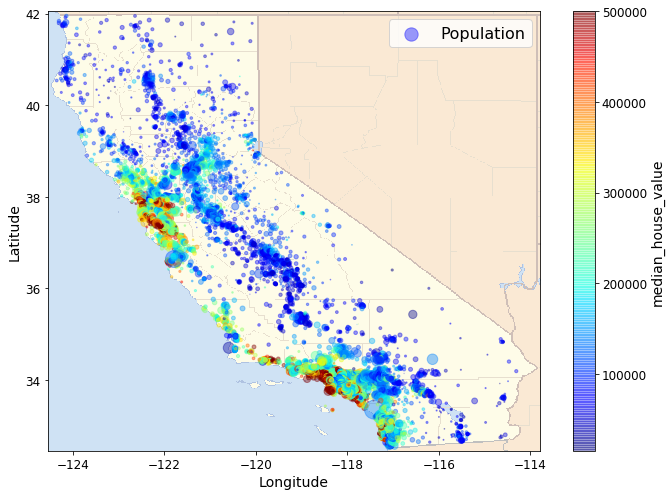

In [ ]:
# This is a excellent discussion of the ideas involved in a plot with a colorbar
# https://stackoverflow.com/questions/19816820/how-to-retrieve-colorbar-instance-from-figure-in-matplotlib
# What's called a "scalar mappable" in that discussion might also be called 
# a scalar-valued function,
# a function that assigns a scalar value to each x,y point being plotted. 
# Our scalar mappable in
# this example is NOT the image of CA, but the housing prices assigned 
# tp each point in the scatter plot.
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(PROJECT_ROOT_DIR,'prepared_images',
                                         'california.png'))
# c is the attribute we'll map onto colors, s is the attribute we'll represent with circle size.
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=True, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# Creating the plot later (doing the plot with colorbar=False) 
# creates some sort of scaling issues.
# Only not sure why.
#prices = housing["median_house_value"]
#tick_values = np.linspace(prices.min(), prices.max(), 11)
#cbar = plt.colorbar(ax=ax)
#cbar.ax.set_yticks([int(round(v/1000)) for v in tick_values])
#cbar.ax.set_yticklabels(["${0:d}k".format(int(round(v/1000))) for v in tick_values])
#cbar.set_label('Median House Value', fontsize=16)
plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

# Using basemap to add to the narrative

Here we sketch briefly how to use `basemap` to do the kind of plotting done above,
using the same color = house value, size = population representation used there.
The primary advantages of using a baremaps mapping system like basemap are. 

1.  We can add geographical features like topography and administrative area (city, county)
    to visualize the correlation of features and housing values.  In this
    way, the same data can be used to visualize many different kinds of
    relationships.
2.  It is very easy to zoom in on areas of interest to get a much more detailed
    picture.  

## A basic regional map

First we draw a map of CA with no data overlay, to cover some basics.  We want to add some
data about geograohic features, and for that we need **shapefiles**, and a data
source to provide them.  See the `shapefiles_basemap` notebook for some help
on data sources.  Here, we'll add in county boundaries, because when we mix in the housing data,  we want a picture of the rich counties of  CA.  We also add river lines.
Note the paths of the Sacramento and San Joaquin rivers, which follow the axis
of the Central valley, and which meet in river delta shown on this map as a small
land gap between the rivers.  They will play a role when we ad housing data.

When plotting with map data, there are two coordinate systems that need to be thought about, the natural lat-long system used for spatial locations on planet earth (in which the
units are degrees), and the coordinate system of the plot (in which the units are 
usually meters).

The class instance created by Basemap is callable, and can be used to
map from one set of ccordinates to the other.  An example in which this mapping is
useful is demonstrated in the code below, in setting labels on the x- and y- axis.
The human interpreting this picture wants to see lat/long labels, but the labels
need to be placed on the axis using the coordinate system of the plot.

/Users/gawron/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/gawron/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/gawron/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/gawron/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


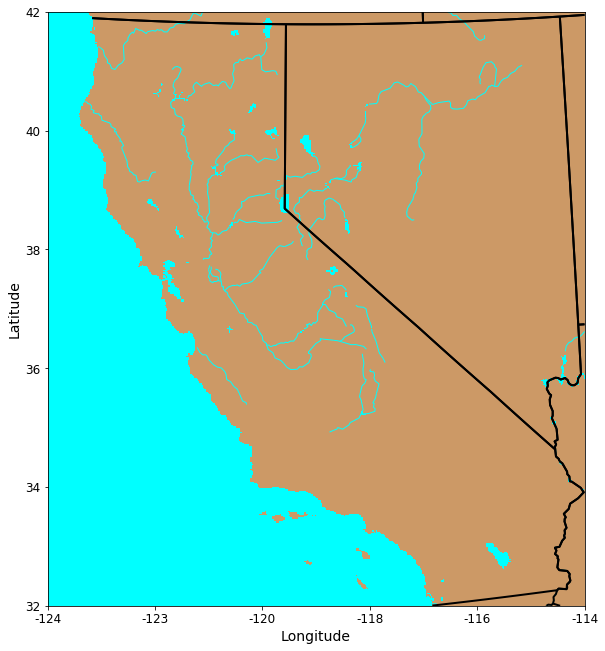

In [ ]:
import os.path
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
#llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat=(-124.5,32.45,-113.80,42.05)
# The LOWER LEFT HAND nd UPPER RIGHT HAND CORNERS of our map.
llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat=(-124.5,32.45,-113.50,42.05)
# Use this number when scaling the figure.  You want to keep the aspect constant
aspect = (urcrnrlat-llcrnrlat)/(urcrnrlon-llcrnrlon)
# Make the figure bigger or smaller
fig_width = 10
fig = plt.figure(figsize=(fig_width/aspect,fig_width))
ax = plt.subplot(111)
# Used centroid as center point.  Let it be known that
# I don't know what I'm doing.  This kind of projection ('tmerc')
# is given a center (where distortion is 0) and I dont know what to think about 
# in choosing it.  Centroid is (37.25, -119.0)
#lat_0,lon_0 = (llcrnrlat + urcrnrlat)/2.,(llcrnrlon + urcrnrlon)/2.
# A value for the center of CA given on the web.  Trying this.
lat_0, lon_0 = 36.778259, -119.417931
map = Basemap(resolution='i', projection='tmerc',
              llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,
              urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
              lon_0=lon_0, lat_0=lat_0)
#####################################################################
# Add Geographic features
#map.fillcontinents(color='#cc9966',lake_color='aqua')
#map.drawcoastlines()
#map.drawrivers(color='aqua',linewidth=1)
countyborderwidth,stateborderwidth = (1,2)
# Draw counties using a basic basemap method.
#map.drawcounties(linewidth=countyborderwidth)
map.drawrivers(color='aqua',linewidth=1)
map.drawstates(linewidth=stateborderwidth)
#####################################################################
# Note that you have to draw country boundaries in
# order to get the southern border of CA drawn with a salient line width.
# Otherwise, since Mexican counties are also drawn with drawcounties,
# the border of Baja and San Diego will look like any other
# county border.
####################################################################
map.drawcountries(linewidth=stateborderwidth)
#####################################################################
map.drawlsmask(land_color='#cc9966',ocean_color='aqua',lakes=True,resolution='f', grid=1.25)
# Set labels on x- and y- axes.
llcrnr_coords = list(map(llcrnrlon,llcrnrlat))
urcrnr_coords = list(map(urcrnrlon,urcrnrlat))
# 6 evenly spaced ticks on each axis.
xt = np.linspace(llcrnr_coords[0],urcrnr_coords[0],6)
yt = np.linspace(llcrnr_coords[1],urcrnr_coords[1],6)
ax.set_xticks(xt)
ax.set_yticks(yt)
#  The next two lines are surely the hardest part, setting the lat/long labels displayed 
#  on the x and y axes.  It requires going FROM axis coords TO Lat longs using `map` as
# function again (but with the `inverse` keyword).
ax.set_xticklabels([int(round(list(map(v,yt[i],inverse=True))[0])) for (i,v) in enumerate(xt)])
ax.set_yticklabels([int(round(list(map(xt[i],v,inverse=True))[1])) for (i,v) in enumerate(yt)])
####################################################################
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

## Adding in our data

Now we draw the map with the housing data, and we add county boundaries. The concentrated
riches of places like Santa Barbara county emerge.  Notice hor close the population
distribution in the CA central valley tracks the path of the Sacramento and San Joquin rivers.

/Users/gawron/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/gawron/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/gawron/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/gawron/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/gawron/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: 
The dedent 

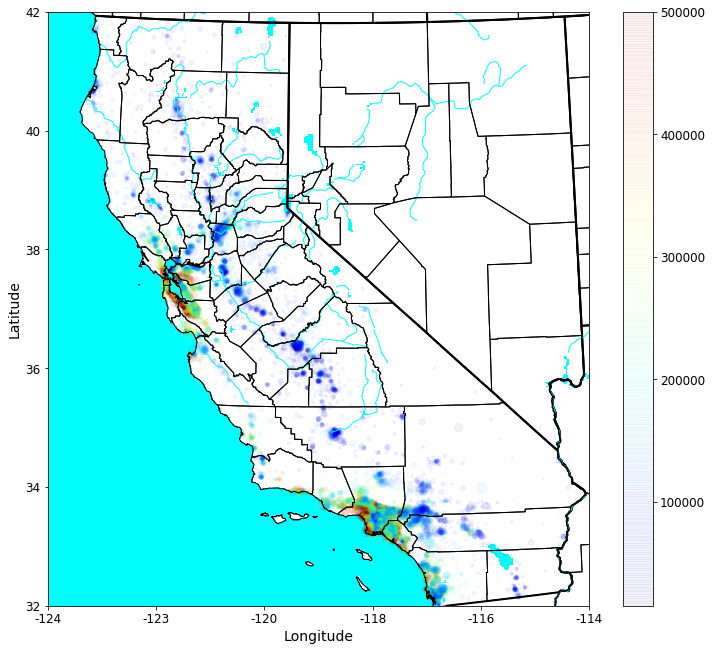

In [ ]:
import os.path
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
#llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat=(-124.5,32.45,-113.80,42.05)
# Best view of CA
llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat=(-124.5,32.45,-113.50,42.05)
#HEIGHT/WIDTH
aspect = (urcrnrlat-llcrnrlat)/(urcrnrlon-llcrnrlon)
# Use this number for scaling the figure.  You want to keep the aspect constant
fig_width = 10
fig = plt.figure(figsize=(fig_width/aspect,fig_width))
ax = plt.subplot(111)
# Used center of mass as center point.  Let it be known that
# I don't know what I'm doing.  This kind of projection ('tmerc')
# is given a center (where distortion is 0) and I dont know what to think about 
# in choosing it.
lat_0,lon_0 = (llcrnrlat + urcrnrlat)/2.,(llcrnrlon + urcrnrlon)/2.
map = Basemap(resolution='i', projection='tmerc',
              llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,
              urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
              lon_0=lon_0, lat_0=lat_0)
#longcoords,latcoords = map(housing.longitude.values,housing.latitude.values)
#map.fillcontinents(color='#ddaa66',lake_color='aqua')
#map.drawcoastlines()
map.drawlsmask(land_color='white',ocean_color='aqua',lakes=True,resolution='f', grid=1.25)
# Draw counties using a basic basemap method.
countyborderwidth,stateborderwidth = (1,2)
# County drawing stopped working in Python3 because of a decoding error.
# Probly an easy fix, but requires modifying Basemap code
#map.drawcounties(linewidth=countyborderwidth)
map.drawstates(linewidth=stateborderwidth)
# Note that you have to draw country boundaries in
# order to get the southern border of CA drawn with a salient line width.
# Since Mexican counties are also drawn with drawcounties
# the border of Baja and San Diego counties will look like any other
# county border unless you also draw country borders.
map.drawcountries(linewidth=stateborderwidth)
map.drawrivers(color='aqua',linewidth=1)
# Must use latlon=True to pass in latlong coords.  
# Otherwise must map latlong coords to axis coords (using `map.__call__`)
collection = map.scatter(housing.longitude.values, housing.latitude.values, 
                 s = housing['population'].values/100,
                 c=housing.median_house_value.values, cmap=plt.get_cmap("jet"),
                 alpha=0.05,latlon=True
                      )
cbar = fig.colorbar(collection)
#Alternatively do counties with shapefile
map.readshapefile("data/admin_areas/USA_adm2", "counties",linewidth=countyborderwidth)
#map.readshapefile("data/admin_areas/USA_roads", "roads", color="m")
#map.readshapefile("data/admin_areas/USA_water_lines_dcw", "water", color="aqua")
#plt.legend()
#####################################################################
# Set labels on x- and y- axes.
llcrnr_coords = list(map(llcrnrlon,llcrnrlat))
urcrnr_coords = list(map(urcrnrlon,urcrnrlat))
# 6 evenly spaced ticks on each axis.
xt = np.linspace(llcrnr_coords[0],urcrnr_coords[0],6)
yt = np.linspace(llcrnr_coords[1],urcrnr_coords[1],6)# Use `map` as a function to get from latlongs to map coords. 
ax.set_xticks(xt)
ax.set_yticks(yt)
#  The next two lines are surely the hardest part, setting the lat/long ticks displayed 
#  on the x and y axes.  It requires going FROM axis coords TO Lat longs using `map` as
# function again (but with the `inverse` keyword).
ax.set_xticklabels([int(round(list(map(v,yt[i],inverse=True))[0])) for (i,v) in enumerate(xt)])
ax.set_yticklabels([int(round(list(map(xt[i],v,inverse=True))[1])) for (i,v) in enumerate(yt)])
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

## Zooming in

Next we zoom in, looking at the geograpically complex picture of the Bay Area.
Notice that proximity to the water
is not a good predictor of house price. The axis down the peninsula that 
defines the highest price homes is determined by the history of land acquisition
in the region, and falls fairly far inland.  In the East Bay, because of Oakland and a number of lower cost communities to the south, it looks as if proximity to the water
lowers prices.

We also add roads, visualizing a network that connects the densely populated areas. The four
main bridges that link the peninsula to the mainland are part of this network.
Alas, only the most important roads are included.  The rough line separating the most highly priced
homes in San Francisco from more reasonably priced homes, is a diagonal line pointing northwest. That is, roughly, Market Street, but it is not in the roads data.

The county boundaries are also informative.  The county immediately south of SF is San Mateo.  Look at the huge difference between northern San Mateo and southern San Mateo, which is really part of Silicon Valley.  The boundary between San Mateo county and Santa Clara county, immediately south, marks an area with a dramatic shift in house values; interestingly, the area of north of the boundary (away from Silicon Valley) is richer. 

/Users/gawron/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/gawron/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/gawron/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


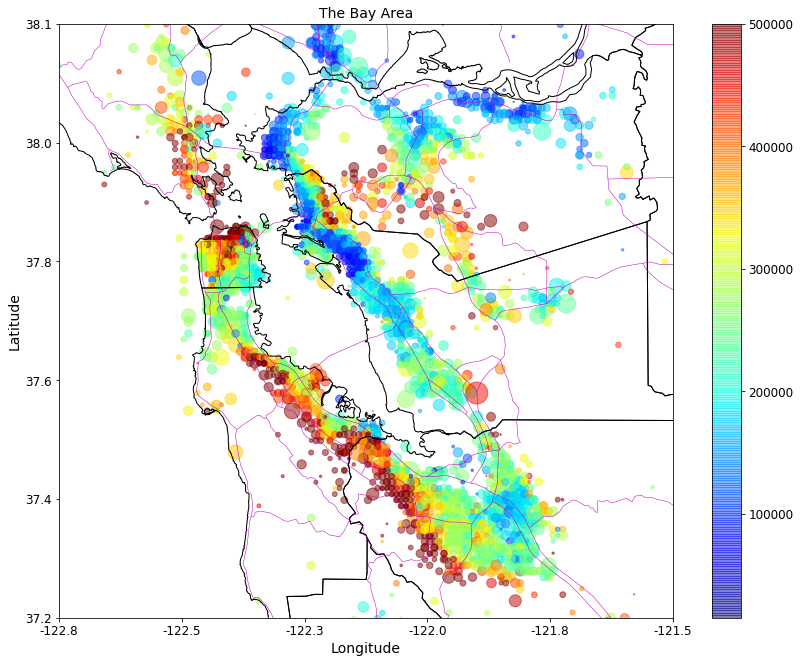

In [ ]:
import os.path
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# Compare all of CA
#llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat=(-124.5,32.45,-113.80,42.05)
llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat=(-122.8, 37., -122., 38.)
#HEIGHT/WIDTH
#llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat=(-124.5,32.45,-113.80,42.05)
llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat=(-122.8,37.15,-121.5,38.15)
aspect = (urcrnrlat-llcrnrlat)/(urcrnrlon-llcrnrlon)
# Use this number for scaling the figure.  You want to keep the aspect constant
fig_width = 10
fig = plt.figure(figsize=(fig_width/aspect,fig_width))
ax = plt.subplot(111)
# Used center of mass as center point.  Let it be known that
# I don't know what I'm doing.  This kind of projection ('tmerc')
# is given a center (where distortion is 0) and I dont know what to think about 
# in choosing it.
lat_0,lon_0 = (llcrnrlat + urcrnrlat)/2.,(llcrnrlon + urcrnrlon)/2.
map = Basemap(resolution='i', projection='tmerc',
              llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,
              urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
              lon_0=lon_0, lat_0=lat_0)
#map.fillcontinents(color='#ddaa66',lake_color='aqua')
#map.drawcoastlines(antialiased=0)
# Draw counties using a basic basemap method.
#countyborderwidth,stateborderwidth = (1,2)
#map.drawcounties(linewidth=countyborderwidth)
# res='i',grid = 1.25 is about best match and it's not very good.
#map.drawlsmask(land_color='white',ocean_color='aqua',lakes=True,resolution='i', grid=1.25)
#No ocean color, poor match with county/ocean boundaries, coral bad background for this colormap
#map.fillcontinents(color='coral',lake_color='aqua')
# Must use latlon=True to pass in latlong coords.  
# Otherwise must map latlong coords to axis coords (using `map(...)`)
collection = map.scatter(housing.longitude.values, housing.latitude.values, 
                 s = housing['population'].values/25,
                 c=housing.median_house_value.values, cmap=plt.get_cmap("jet"),
                 alpha=0.5,latlon=True
                      )
cbar = fig.colorbar(collection)
#Alternatively do counties with shapefile
map.readshapefile("data/admin_areas/USA_adm2", "counties",linewidth=countyborderwidth)
map.readshapefile("data/admin_areas/USA_roads", "roads", color="m")
#map.readshapefile("data/admin_areas/USA_water_lines_dcw", "water", color="aqua")
#####################################################################
# Set labels on x- and y- axes.
# Use map as a function from lat/long  to coords in thios projection
llcrnr_coords = list(map(llcrnrlon,llcrnrlat))
urcrnr_coords = list(map(urcrnrlon,urcrnrlat))
# 6 evenly spaced ticks on each axis.
xt = np.linspace(llcrnr_coords[0],urcrnr_coords[0],6)
yt = np.linspace(llcrnr_coords[1],urcrnr_coords[1],6)
ax.set_xticks(xt)
ax.set_yticks(yt)
ax.set_xticklabels(['{0:.1f}'.format(list(map(v,yt[i],inverse=True))[0]) 
                    for (i,v) in enumerate(xt)])
ax.set_yticklabels(['{0:.1f}'.format(list(map(xt[i],v,inverse=True))[1]) 
                    for (i,v) in enumerate(yt)])
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title('The Bay Area', fontsize=14)
plt.show()

Next, the San Diego area.

/Users/gawron/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/gawron/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/gawron/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


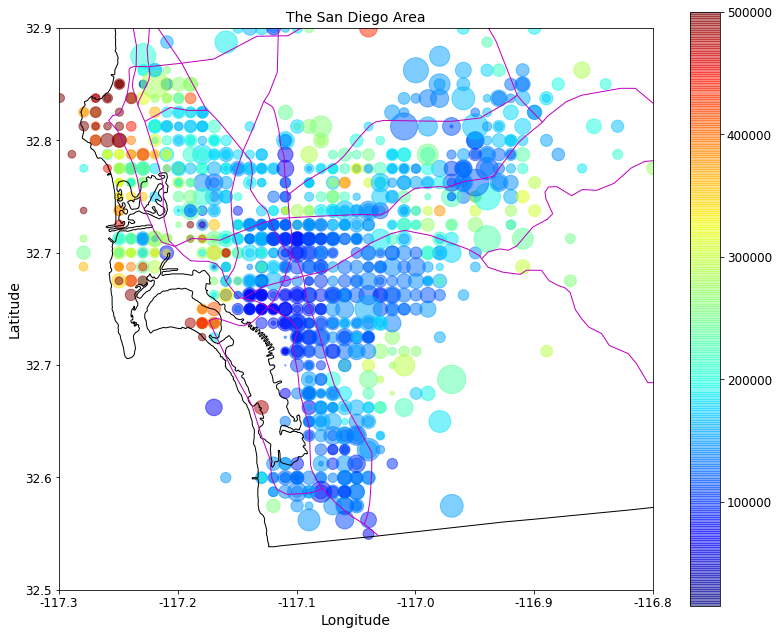

In [ ]:
import os.path
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat=(-117.3,32.5,-116.8,32.9)
aspect = (urcrnrlat-llcrnrlat)/(urcrnrlon-llcrnrlon)
# Use this number for scaling the figure.  You want to keep the aspect constant
fig_width = 10
fig = plt.figure(figsize=(fig_width/aspect,fig_width))
ax = plt.subplot(111)
# Used center of mass as center point.  Let it be known that
# I don't know what I'm doing.  This kind of projection ('tmerc')
# is given a center (where distortion is 0) and I dont know what to think about 
# in choosing it.
lat_0,lon_0 = (llcrnrlat + urcrnrlat)/2.,(llcrnrlon + urcrnrlon)/2.
map = Basemap(resolution='i', projection='tmerc',
              llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,
              urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
              lon_0=lon_0, lat_0=lat_0)
#map.fillcontinents(color='#ddaa66',lake_color='aqua')
#map.drawcoastlines(antialiased=0)
# Draw counties using a basic basemap method.
countyborderwidth,stateborderwidth = (1,2)
#map.drawcounties(linewidth=countyborderwidth)
#map.drawlsmask(land_color='white',ocean_color='aqua',lakes=True,resolution='f', grid=1.25)

# Must use latlon=True to pass in latlong coords.  
# Otherwise must map latlong coords to axis coords (using `map.__call__`)
collection = map.scatter(housing.longitude.values, housing.latitude.values, 
                 s = housing['population'].values/10,
                 c=housing.median_house_value.values, cmap=plt.get_cmap("jet"),
                 alpha=0.5,latlon=True
                      )
cbar = fig.colorbar(collection)
#Alternatively do counties with shapefile
map.readshapefile("data/admin_areas/USA_adm2", "counties",linewidth=countyborderwidth)
map.readshapefile("data/admin_areas/USA_roads", "roads", color="m",linewidth=1)
# We have 
#map.readshapefile("data/admin_areas/USA_water_lines_dcw", "water", color="aqua")
#####################################################################
# Set labels on x- and y- axes.
llcrnr_coords = list(map(llcrnrlon,llcrnrlat))
urcrnr_coords = list(map(urcrnrlon,urcrnrlat))
# 6 evenly spaced ticks on each axis.
xt = np.linspace(llcrnr_coords[0],urcrnr_coords[0],6)
yt = np.linspace(llcrnr_coords[1],urcrnr_coords[1],6)# Use `map` as a function to get from latlongs to map coords. 
ax.set_xticks(xt)
ax.set_yticks(yt)
ax.set_xticklabels(['{0:.1f}'.format(list(map(v,yt[i],inverse=True))[0]) for (i,v) in enumerate(xt)])
ax.set_yticklabels(['{0:.1f}'.format(list(map(xt[i],v,inverse=True))[1]) for (i,v) in enumerate(yt)])
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title('The San Diego Area', fontsize=14)
plt.show()

# A Kernel Density Estimation example

We are going to draw a map that uses a probability estimate of a geographically linked variable.   When a probability estimate is appropriate, and reasonably accurate, it is a very powerful tool; the problem is to know when a probability estimate is appropriate. 

Let's think about some basics.  In the previous example we looked at data about housing
prices, an eminently geographic property that is a number.  What is the price of House A?  Or in our particular case, the median price of houses in District A? In this example we're going to look at species distributions, an eminently geographic property that could also be expressed as a number.  What is the population of species A in district 1?  The question is: How meaningful is that number? Since natural events can raise and lower the population, since species members move around from day to to day, often in large numbers, any data we collect is likely to be outdated very quickly.  More interestingly, species population numbers are likely to change from place to place in predictable ways: There is a general tendency for the species population of district 1 to be similar  to that of nearby districts.  What we have is a variable that behaves like a continuous function over locations.  These features suggest that it is profitable to think of species distribution as a probability distribution conditioned by location.  Notice how the housing price example differs.  Housing prices are much more stable
from day to day.  They are also much less continuous.  The housing prices of one district
are not a very good predictor of the housing prices of a neighboring district. Both housing
prices and species population numbers can change dramatically over short distances  --  
natural barriers can have dramatic effects in both cases -- but dramatic changes over short distances are much more the norm for housing prices.  All this suggests that what we want for predicting housing prices is the actual prices of actual houses, and if not that, the closer to that that we can get, the better.  With species, data about actual sightings of actual species members is still the ground truth, but what we can reliably conclude from a sighting is best expressed as an increase in our chances of seeing species members, a probability distribution. 

And that is the kind of thing we know how to draw a picture for.  We are going to draw
what's called a **contour** plot.  A contour plot tells us the value of a continuous function on a 2D grid.  In the simplest case, what we draw is lines telling us the places
where the value of the function is the same. Those lines will generally be connected because the function is continuous. We can color code the lines to tell
us the direction in which the function value increases, and if we draw lots of
lines and use a continuous color map we get a full picture of the peaks and
valleys of the function.

First we get some raw data about species distribution. In particular we're going to look
at distributions for 'Bradypus Variegatus' (the brown-throated sloth) 

<img src = "images/Brown_throated_sloth.jpg" width=300>

and  'Microryzomys Minutus' (the forest small rice rat)

<img src = "images/Microryzomys-minutus.jpg" width=300>

This data consists of raw
numbers for species population at particular lat/long coordinates. 
Then we **fit** a certain kind of probability distribution called a **Gaussian** to it. That defines a continuous function over lat/long coordinates. The value returned for any coordinate  by that function -- which is called a probability function -- is the probability of seeing a member of species at that latitude and longitude. Then we draw a **contour plot** of the 
function.  We will use a "reds" colormap:  this is a sequential colormap in which increasing darkness and saturation of the color increases a higher numerical value.  Basically, the redder the shade, the higher the probability.  You can learn more about `matplotlib` colormaps
and find other maps to try [here](https://matplotlib.org/users/colormaps.html).

For those interested in more technical details, here are some facts about the computation:

1.  What we are actually going to use is a **probability density** function which assigns
probabilities to spatial regions, not to points.
2.  The "fitting" of a probability function to set of points is called a **kernel density estimation.**  Broadly speaking, the probability values are smoothed to assign values to all the points on the map, not just the ones we know about, using the principle that points that are close together have similar probabilities. We use the 'haversine' metric appropriate for lat/long coordinates (and spherical coordinates) to define "closeness".  It basically gives us the distance between
points given their lat-long coordinates.  We use the **Ball Tree** algorithm for
kernel density estimation because it is the most appropriate for geographic applications.


In [ ]:
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_species_distributions
from sklearn.datasets.species_distributions import construct_grids
from sklearn.neighbors import KernelDensity


In [ ]:
try:
    from mpl_toolkits.basemap import Basemap
    basemap = True
except ImportError:
    basemap = False

In [ ]:
basemap

True

The cell above does the basic imports. Note that an import is **attempted** for a module named `Basemap`, but a flag is set in case that import fails.  More on this below.

In [ ]:
# Get matrices/arrays of species IDs and locations
data = fetch_species_distributions()
species_names = ['Bradypus Variegatus', 'Microryzomys Minutus']

# The only attributes we care about in `training` are lat and long.
Xtrain = np.vstack([data['train']['dd lat'],
                    data['train']['dd long']]).T
# Microryzomys Minutus gets coded as 1,
# Bradypus Variegatus as 0
ytrain = np.array([d.decode('ascii').startswith('micro')
                  for d in data['train']['species']], dtype='int')
Xtrain *= np.pi / 180.  # Convert lat/long to radians

# Set up the data grid for the contour plot
xgrid, ygrid = construct_grids(data)
# To help kernel density estimation take a reasonable length of time we 
# consistently use every 5th data point
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
# We'll make use of the fact that coverages[6] has measurements at all
# land points.  This will help us decide between land and water.
land_reference = data.coverages[6][::5, ::5]
# -9999 means water.  Make a Boolean grid identifying land.
land_mask = (land_reference > -9999).ravel()

xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = xy[land_mask]
xy *= np.pi / 180.

In [ ]:
def avg_X (X):
    return X.min() + (X.max()-X.min())/2

X.min(),X.max(), avg_X(X), Y.min(), Y.max(), avg_X(Y)

(-94.75,
 -34.25000000000344,
 -64.50000000000172,
 -56.0,
 23.49999999999548,
 -16.25000000000226)

/Users/gawron/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


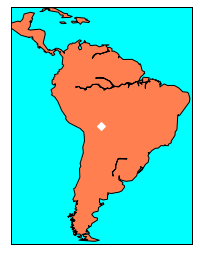

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def avg_X (X):
    return X.min() + (X.max()-X.min())/2

map = Basemap(projection='cyl', llcrnrlat=Y.min(),
                    urcrnrlat=Y.max(), llcrnrlon=X.min(),
                    urcrnrlon=X.max(), resolution='c')
Xa,Ya = avg_X(X),avg_X(Y)
x0, y0 = list(map(Xa, Ya))
#x1, y1 = map(180, 85)
#map = Basemap(projection='ortho',
#lat_0=0, lon_0=0)
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()
#x, y = map(0, 0)
map.plot(x0, y0, marker='D',color='w')
plt.show()

The `sklearn` species distrubution docs are [here](http://scikit-learn.org/stable/auto_examples/applications/plot_species_distribution_modeling.html).  This is data appropriate for conservation studies, including data about species distrubutions and 14 environmental variables.  In this section we'll just explore the relationship between the distribution facts and locations, and throw away the rest.

In [ ]:
data.coverages[6].shape

The cell above gets the data and does some preprocessing.  Let's look 
at the result first.

In [ ]:
print((xy.shape))
xy [:5]

(28008, 2)


array([[ 0.41015237, -1.35699349],
       [ 0.41015237, -1.35263017],
       [ 0.41015237, -1.33081355],
       [ 0.41015237, -1.32645023],
       [ 0.41015237, -1.32208691]])

`xy` is a 28,008 x 2 array.  The numbers are lat long coordinates converted to radians (basically, degrees are converted to radians).

In [ ]:
print((ytrain[:5]))
ois = [(i,cls) for (i,cls) in enumerate(ytrain) if cls == 1]
zis = [(i,cls) for (i,cls) in enumerate(ytrain) if cls == 0]
print((len(ytrain)))
print((ois[:5], len(ois)))
print((zis[:5], len(zis)))

[1 1 1 1 1]
1624
([(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], 698)
([(88, 0), (89, 0), (90, 0), (91, 0), (92, 0)], 926)


`ytrain` tells us our species (0 is 'Bradypus Variegatus', 1 is 'Microryzomys Minutus'.
There are 1,624 species location tuples in the data, 698 'Microryzomys Minutus' and
926 'Bradypus Variegatus',.

 - computing KDE in spherical coordinates
 - computing KDE in spherical coordinates


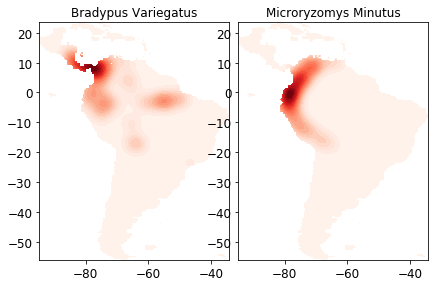

In [ ]:
# Plot map of South America with distributions of each species
fig = plt.figure()
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)

for i in range(2):
    plt.subplot(1, 2, i + 1)

    # construct a kernel density estimate of the distribution
    print(" - computing KDE in spherical coordinates")
    kde = KernelDensity(bandwidth=0.04, metric='haversine',
                        kernel='gaussian', algorithm='ball_tree')
    kde.fit(Xtrain[ytrain == i])

    # evaluate only on the land: -9999 indicates ocean
    Z = -9999 + np.zeros(land_mask.shape[0])
    Z[land_mask] = np.exp(kde.score_samples(xy))
    Z = Z.reshape(X.shape)

    # plot contours of the density
    levels = np.linspace(0, Z.max(), 25)
    plt.contourf(X, Y, Z, levels=levels, cmap=plt.cm.Reds)
    plt.title(species_names[i])
plt.show()

The cell above trains the KDE model on the species distribution
data and draws the contour plots. You can see the lightly
drawn outline of South America in both species plots. It's there because `land_mask` restricts our data to points on land, and since we have 
species data from all over South America, our points capture the shape of the 
entire land mass.  Next  we'll redraw
the picture adding `basemap` to draw an outline map of South America,
coordinated with our data, including major rivers and country borders, to help locate the contour masses. This picture will help us tell a story our data.  For example, we'll
see that *Bradypus Variegatus* has populations along the eastern Amazon,
where *Microryzomus Minutus*  does not.  However the habitation area of  *Microryzomus Minutus*
extends much further south, along the entire Peruvian coast.  To learn more about `basemap`,
look [here](https://matplotlib.org/basemap/users/examples.html) and also [here](https://werthmuller.org/blog/2014/basemap/).

 - computing KDE in spherical coordinates
 - plot coastlines using basemap
 - computing KDE in spherical coordinates


/Users/gawron/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/gawron/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


 - plot coastlines using basemap


/Users/gawron/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/gawron/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


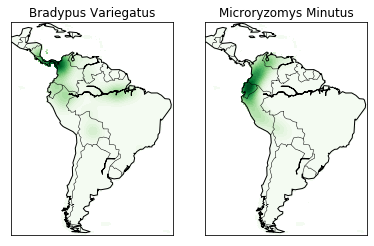

In [ ]:
for i in range(2):
    plt.subplot(1, 2, i + 1)

    # construct a kernel density estimate of the distribution
    print(" - computing KDE in spherical coordinates")
    kde = KernelDensity(bandwidth=0.04, metric='haversine',
                        kernel='gaussian', algorithm='ball_tree')
    kde.fit(Xtrain[ytrain == i])

    # evaluate only on the land: -9999 indicates ocean
    Z = -9999 + np.zeros(land_mask.shape[0])
    Z[land_mask] = np.exp(kde.score_samples(xy))
    Z = Z.reshape(X.shape)

    # plot contours of the density
    levels = np.linspace(0, Z.max(), 25)
    plt.contourf(X, Y, Z, levels=levels, cmap=plt.cm.Greens)
    plt.title(species_names[i])    
    if basemap:
        print(" - plot coastlines using basemap")
        m = Basemap(projection='cyl', llcrnrlat=Y.min(),
                    urcrnrlat=Y.max(), llcrnrlon=X.min(),
                    urcrnrlon=X.max(), resolution='c')
        m.drawcoastlines()
        m.drawcountries()
    else:
        print(" - plot coastlines from coverage")
        plt.contour(X, Y, land_reference,
                    levels=[-9999], colors="k",
                    linestyles="solid")
        plt.xticks([])
        plt.yticks([])

    plt.title(species_names[i])

plt.show()

 The codeblock under
`if basemap` draws the coastlines and country borders using `basemap`.  The `else` block
is executed if `basemap` is not available and just draws boundaries based on the locations
in the data, which basically just draws black lines along the lightly shaded boundaries
of our first picture.  You can see what that looks like even if you do have
`basemap` by changing the `if basemap` line to `if not basemap`. It's not bad, but it's
not nearly as easy to understand how the colors relate to actual locations.

# Human population density


In this example, we will do something very similar to the last example, but
without using the `scikit_learn` `KDEDensity` class.

We'll also use a different species to represent the distribution of: humans.

In [ ]:
import pandas as pd
filename = 'data/worldcitiespop2.txt'
data = pd.read_csv(filename, sep = ',',
                   names = ['Country','AccentCountry','Population','Latitude','Longitude'])


/Users/gawron/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.describe()

,Population,Latitude,Longitude
count,4.798000e+04,3.173958e+06,3.173958e+06
mean,4.771957e+04,2.718817e+01,3.708886e+01
std,3.028887e+05,2.195262e+01,6.322302e+01
min,7.000000e+00,-5.493333e+01,-1.799833e+02
25%,3.732000e+03,1.163333e+01,7.303175e+00
50%,1.077900e+04,3.249722e+01,3.528000e+01
75%,2.799050e+04,4.371667e+01,9.570354e+01
max,3.148050e+07,8.248333e+01,1.800000e+02


Let's plot the raw coordinates, with one pixel per position.

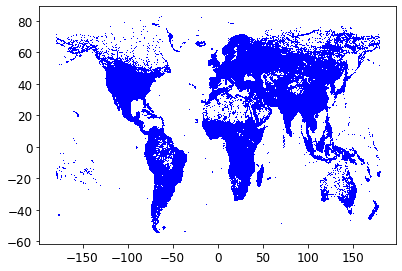

In [ ]:
plt.plot(data.Longitude, data.Latitude, ',')

We easily recognize the world map!

It's helpful that people tend to to congregate on coastlines!

In [ ]:
locations = data[['Longitude','Latitude']].as_matrix()

/Users/gawron/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


The idea is to draw a map in which each of these locations is colored
with an i ntensity correpsonding to its population.

To start, we load a world map with `matplotlib.basemap`.

In [ ]:
from mpl_toolkits.basemap import Basemap
m = Basemap(projection='mill', llcrnrlat=-65, urcrnrlat=85, llcrnrlon=-180, urcrnrlon=180)

/Users/gawron/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


The name `m` is now set to a Python function that returns Cartesian coordinates when given Lat/Longs.
We get the Cartesian coordinates of the map's corners.

In [ ]:
x0, y0 = m(-180, -65)
x1, y1 = m(180, 85)

In [ ]:
x1,y1

(40030154.742485225, 21534769.36545656)

Now we will draw a histogra for the 2D grid that falls inside these corners.

Each grid cell should get a weight from the data.  Essentilly we need 
a 2D histogram.

Let's create a histogram of the human density. First, we retrieve the population of every city.

In [ ]:
population = data.Population

We project the geographical coordinates into cartesian coordinates.

In [ ]:
x, y = m(locations[:,0], locations[:,1])

We handle cities which do not have a population value.

In [ ]:
weights = population.copy()
weights[np.isnan(weights)] = 1000

We create the 2D histogram with NumPy.

In [ ]:
h, _, _ = np.histogram2d(x, y, bins=(np.linspace(x0, x1, 500), 
                                     np.linspace(y0, y1, 500)), 
                         weights=weights)
h[h==0] = 1

We filter this histogram with a Gaussian kernel.

In [ ]:
import scipy.ndimage.filters
z = scipy.ndimage.filters.gaussian_filter(np.log(h.T), 1)

We draw the coast lines in the world map, as well as the filtered human density.

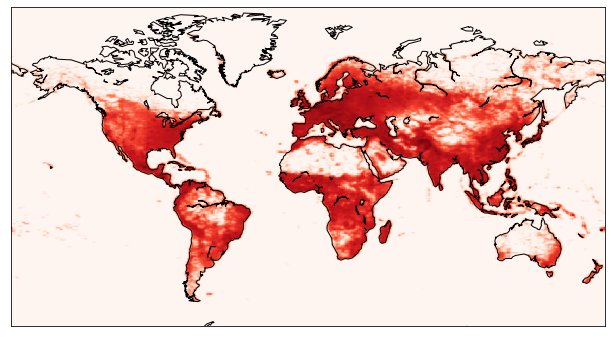

In [ ]:
plt.figure(figsize=(10,6))
m.drawcoastlines()
m.imshow(z, origin='lower', extent=[x0,x1,y0,y1], cmap=plt.get_cmap('Reds'))